# Visualizing Lab-Data:

In [45]:
from astropy.io import fits as pyfits
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
from mayavi import mlab
%matplotlib notebook
#%matplotlib inline

## Read data

In [2]:
'''Read Fits Files and Darks'''
f='/Volumes/Pandora/FOXSI/OpCal/X10Test/data/kFOXSI3_X10-Test_CCD_T2Sx6_10kV_0p02mA_0mmZ.fits'
d='/Volumes/Pandora/FOXSI/OpCal/X10Test/Dark1_FOXSI3_X10-Test_CCD_T2Sx6_10kV_0p02mA_+15mmZ.fits'
F=pyfits.open(f); D=pyfits.open(d)
## compress all images into one image by average all the pixels
if len(F[0].data.shape) == 3:
    print("Found {0} exposures. Averaging...".format(F[0].data.shape[0]))
    data = np.average(F[0].data, axis=0) - np.average(D[0].data, axis=0)
else:
    data = F[0].data - D[0].data

''' Cropping around maximum '''
xm, ym = np.unravel_index(data.argmax(), data.shape); width=10; 
subdata = data[ xm-width:xm+width , ym-width:ym+width]
''' Create meshgrid '''
XX, YY = np.meshgrid(*[np.arange(v) for v in subdata.shape]) ##The single star * unpacks the sequence into positional arguments

Found 6 exposures. Averaging...


## Plot with matplotlib

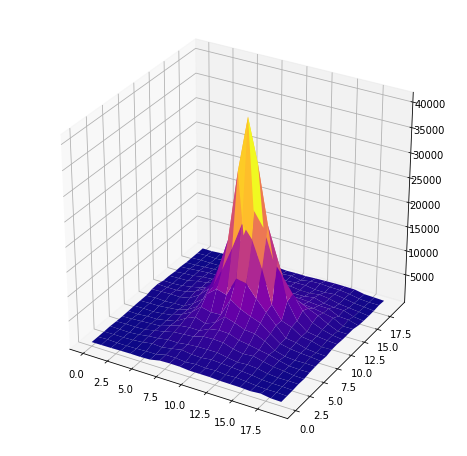

In [3]:
plt.figure(figsize=(8,8))
ax = plt.axes(projection='3d')
ax.plot_surface(XX,YY,subdata,cmap='plasma')
plt.show()

## Plot with Mayavi

In [48]:
mlab.surf(subdata,warp_scale='auto')
mlab.axes()
mlab.show()

## Mayavi

In [1]:
# Create the data.
from numpy import pi, sin, cos, mgrid
dphi, dtheta = pi/250.0, pi/250.0
[phi,theta] = mgrid[0:pi+dphi*1.5:dphi,0:2*pi+dtheta*1.5:dtheta]
m0 = 4; m1 = 3; m2 = 2; m3 = 3; m4 = 6; m5 = 2; m6 = 6; m7 = 4;
r = sin(m0*phi)**m1 + cos(m2*phi)**m3 + sin(m4*theta)**m5 + cos(m6*theta)**m7
x = r*sin(phi)*cos(theta)
y = r*cos(phi)
z = r*sin(phi)*sin(theta)


In [2]:
# View it.
from mayavi import mlab

In [5]:
s = mlab.mesh(x, y, z)
mlab.show()

In [13]:
import numpy as np
from mayavi.mlab import *

def test_surf():
    """Test surf on regularly spaced co-ordinates like MayaVi."""
    def f(x, y):
        sin, cos = np.sin, np.cos
        return sin(x + y) + sin(2 * x - y) + cos(3 * x + 4 * y)

    #x, y = np.mgrid[-7.:7.05:0.1, -5.:5.05:0.05]
    s = surf(XX, YY, f)
    #cs = contour_surf(x, y, f, contour_z=0)
    return s

In [14]:
test_surf()
mlab.show()